# Practica 1

In [2]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

# Diseño de los gráficos
sns.set()
sns.set_context("paper")
sns.set_palette("colorblind")

In [41]:
# Altura del agua
h = np.arange(10,101, 10)

# Desplazamientos del haz del infrarrojo
x_30 = np.array([1, 3, 6, 7, 9, 11, 13, 15, 17, 19])
x_45 = np.array([4, 8, 13, 16, 20, 24, 28, 33, 36, 40])
x_60 = np.array([9, 19, 27, 37, 49, 56, 67, 76, 86, 96])

# Funcion lineal
def lineal(h, b):
    return h * b

# Calculo del R2
def R2(x_datos, y_datos, b):
    y_ajuste = lineal(x_datos, b)
    RSS = np.sum((y_datos - y_ajuste)**2)
    TSS = np.sum((y_datos - np.mean(y_datos))**2)
    return 1 - RSS / TSS

# Grosor del vidrio
grosor = 4

In [44]:
def Refraccion(ang_in, x):
    b, db = curve_fit(lineal, h, x)
    b = b[0]; db = np.sqrt(db[0][0])

    # Calculo del R2
    r2 = R2(h, x, b)

    fig, ax = plt.subplots(figsize=(10, 8))
    H = np.linspace(0, 101, 100)
    ax.scatter(h, x)
    ax.plot(H, lineal(H, b), label= rf"Ajuste $R^2 = {r2:.3f}$")
    ax.set_xlabel(r"Altura del agua [mm]", fontsize= 14)
    ax.set_ylabel(r"Desplazamiento del haz [mm]", fontsize= 14)
    ax.grid(True)
    ax.legend(fontsize= 13)
    plt.tight_layout()
    #fig.savefig("Prac1_Ajuste_exp1.pdf")
    plt.show()

    # Calcular la tangente del angulo de refraccion a partir de la pendiente
    tan = np.tan(np.deg2rad(ang_in)) - b

    # Angulo de refraccion para angulo incidente
    ang = np.arctan(tan)
    print(f"El angulo de refraccion para el angulo incidente {ang_in:.1f} es: {np.rad2deg(ang)}")

    # Calcular el indice de refraccion del agua (Se asume el indice del aire como 1)
    n_agua = np.sin(np.deg2rad(ang_in)) / np.sin(ang)
    print(f"El indice de refraccion del agua para angulo incidente {ang_in:.1f} es: {n_agua}")

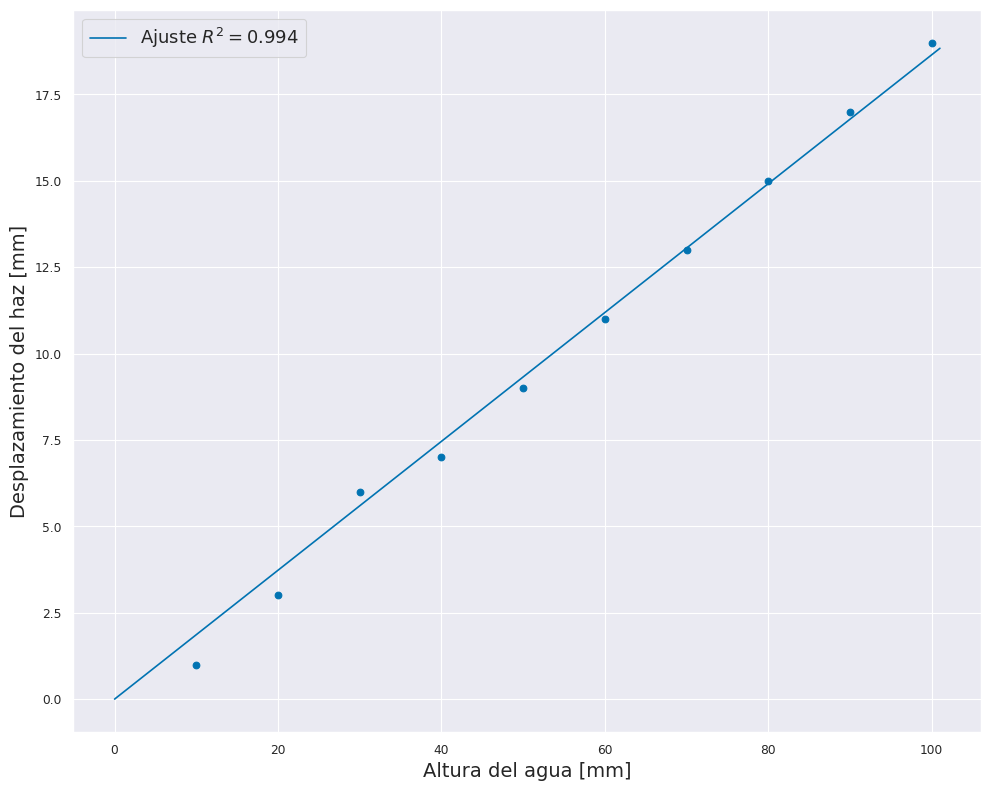

El angulo de refraccion para el angulo incidente 30.0 es: 21.348379438182242
El indice de refraccion del agua para angulo incidente 30.0 es: 1.3734837321471371


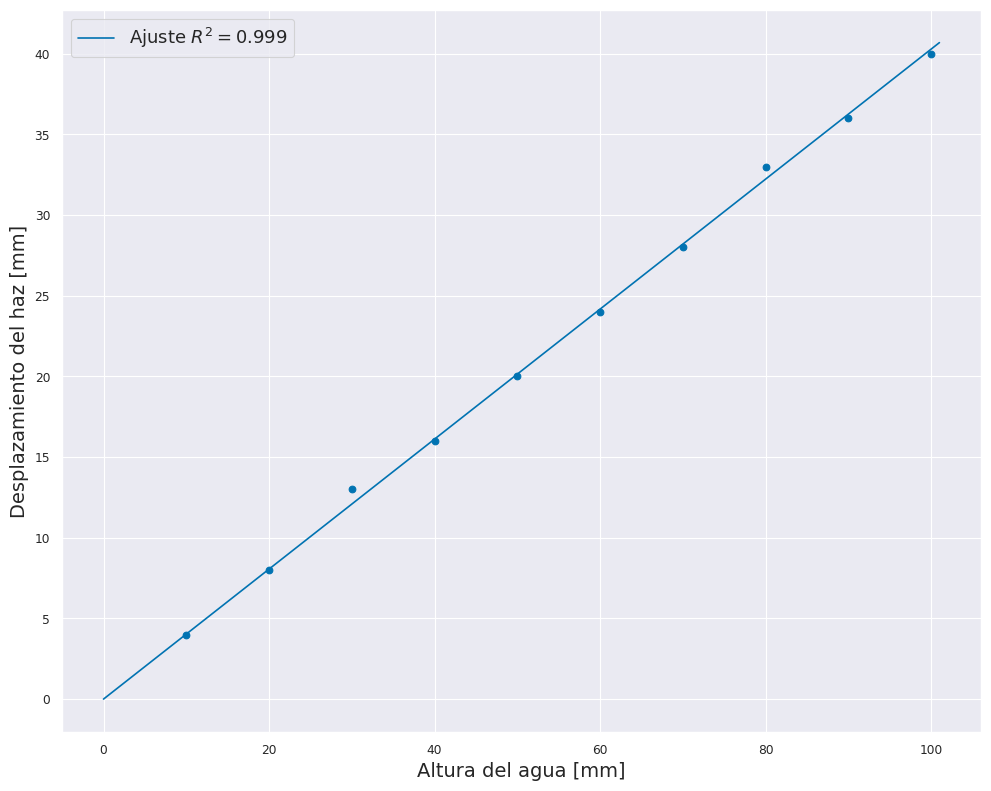

El angulo de refraccion para el angulo incidente 45.0 es: 30.843235507655795
El indice de refraccion del agua para angulo incidente 45.0 es: 1.3792068328688913


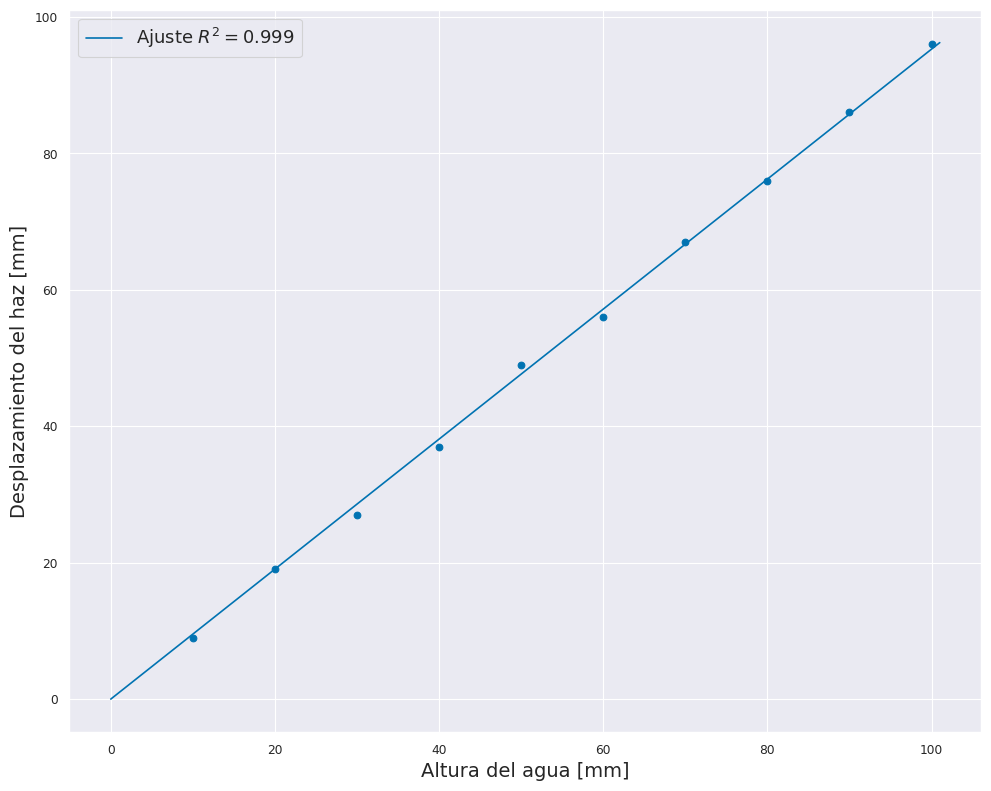

El angulo de refraccion para el angulo incidente 60.0 es: 37.93012535763445
El indice de refraccion del agua para angulo incidente 60.0 es: 1.4088586247620183


In [45]:
Refraccion(30, x_30)
Refraccion(45, x_45)
Refraccion(60, x_60)


1.3734837321471371
